# Introduction

The source data for this analysis contains records from 110,527 medical appointments and can be found here: https://www.kaggle.com/datasets/joniarroba/noshowappointments

In [1]:
# Import libraries for this analysis
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Load the dataset
base_data = pd.read_csv('Data.csv')

In [3]:
# Take a look at the data
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Find the number of rows and columns
base_data.shape

(110527, 14)

In [5]:
# Check data types of each column
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Data Cleaning

In [6]:
# Converting the date and time into standard form
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
# Confirm conversion
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Return the day of the week (Monday-Sunday = 0-6) for the schedule day and appointment day
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [9]:
# View distribution across days of the week for schedule days
base_data['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [10]:
# View distribution across days of the week for appointment days
base_data['app_weekday'].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [11]:
# View column names
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [12]:
# Rename some columns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [13]:
# Confirm renaming successful
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [14]:
# Drop columns we're not interested in
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [23]:
# Check whether data contains missing values
base_data.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
NoShow            0
sch_weekday       0
app_weekday       0
dtype: int64

In [15]:
# Check over the cleaned dataset
base_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [16]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [24]:
# Create a copy of base data just in case
new_data = base_data.copy()

# Exploratory Data Analysis

In [17]:
# Have a look at distributions for variables
base_data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


In [64]:
# Count the amount of NoShows (target variable)
base_data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

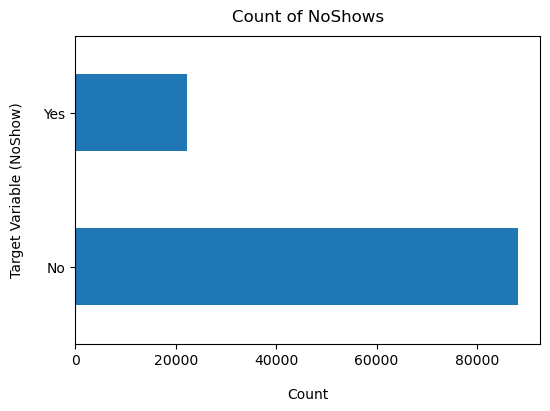

In [21]:
# Visualise target variable
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable (NoShow)", labelpad=14)
plt.title("Count of NoShows", y=1.02);

In [63]:
# Calculate NoShow rates as a percentage
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [25]:
# Find upper limit of age range
print(base_data['Age'].max())

115


In [26]:
# Group patient age in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [27]:
# Remove original age data
base_data.drop(['Age'], axis=1, inplace=True)

## Data Exploration

In [29]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Scholarship ------

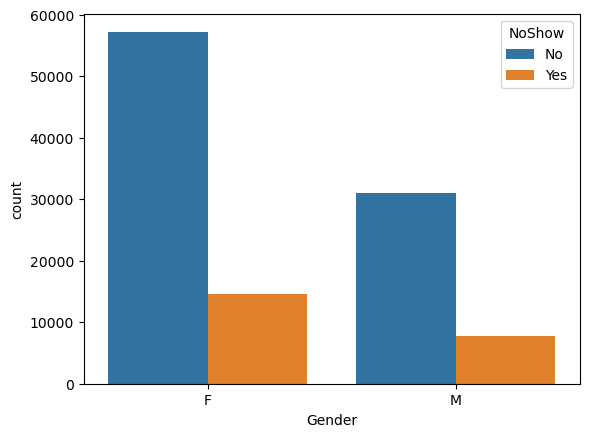

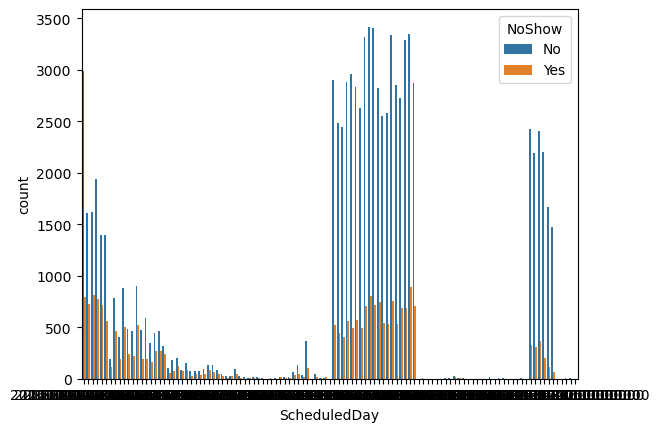

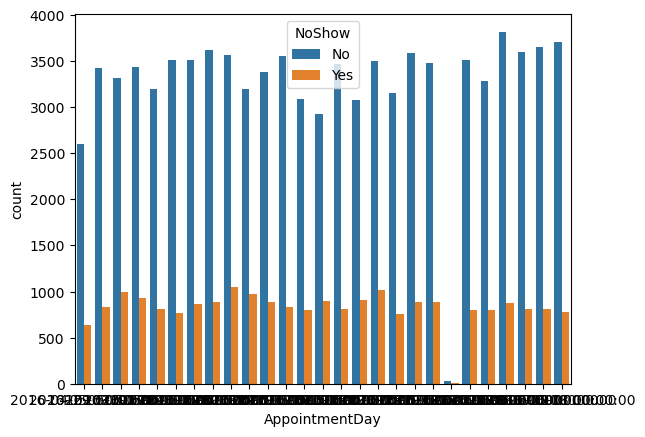

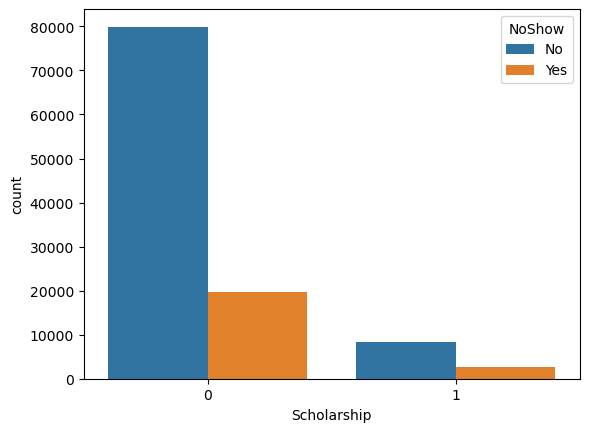

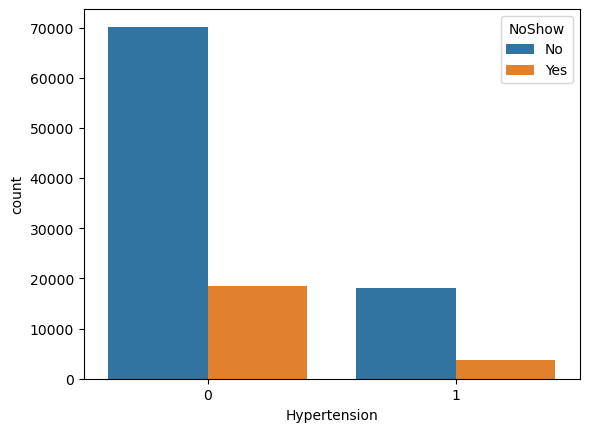

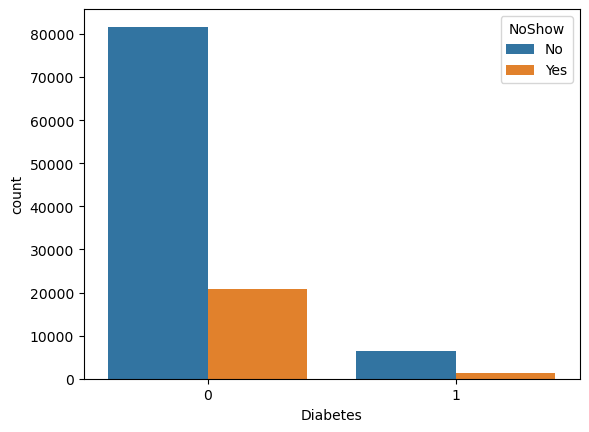

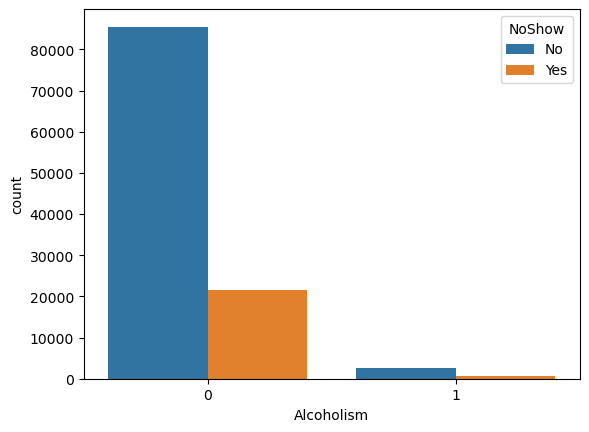

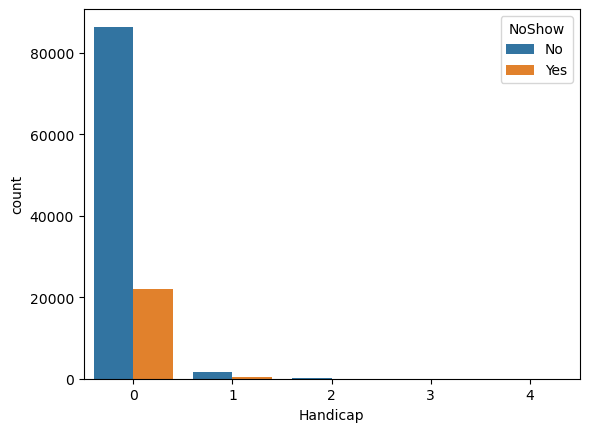

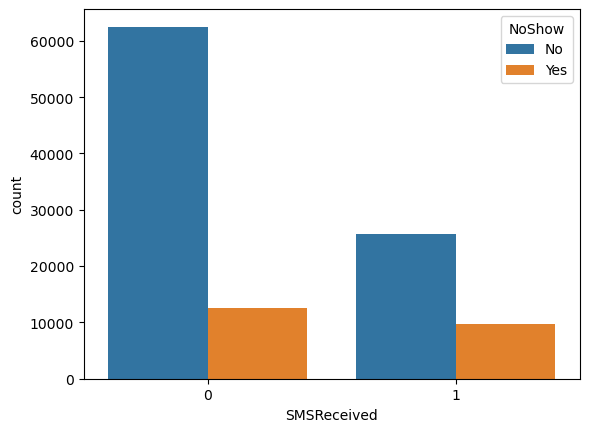

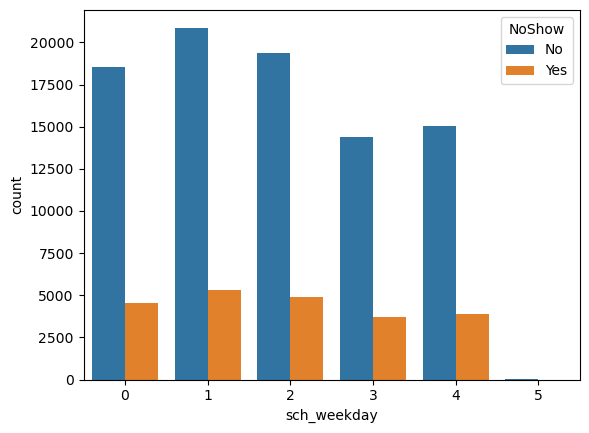

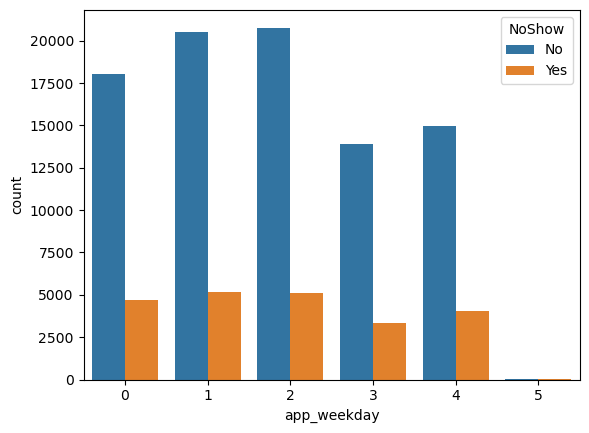

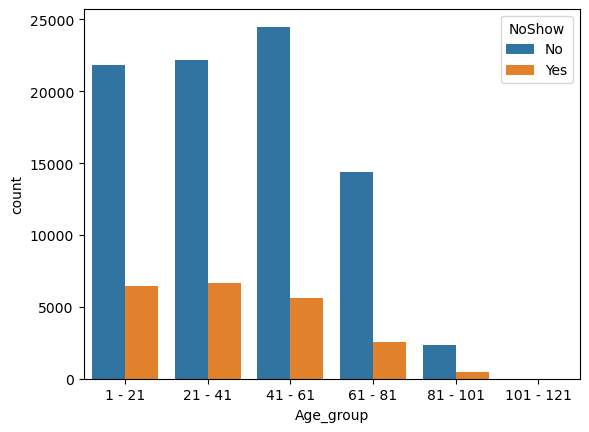

In [30]:
# Loop through each column, count variables, and visualise relationship to target variable (NoShow) 
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')


In [31]:
# Convert target variable into a dummy variable
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [32]:
base_data.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [32]:
# Covert all categorical variables into dummy variables
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


<Axes: >

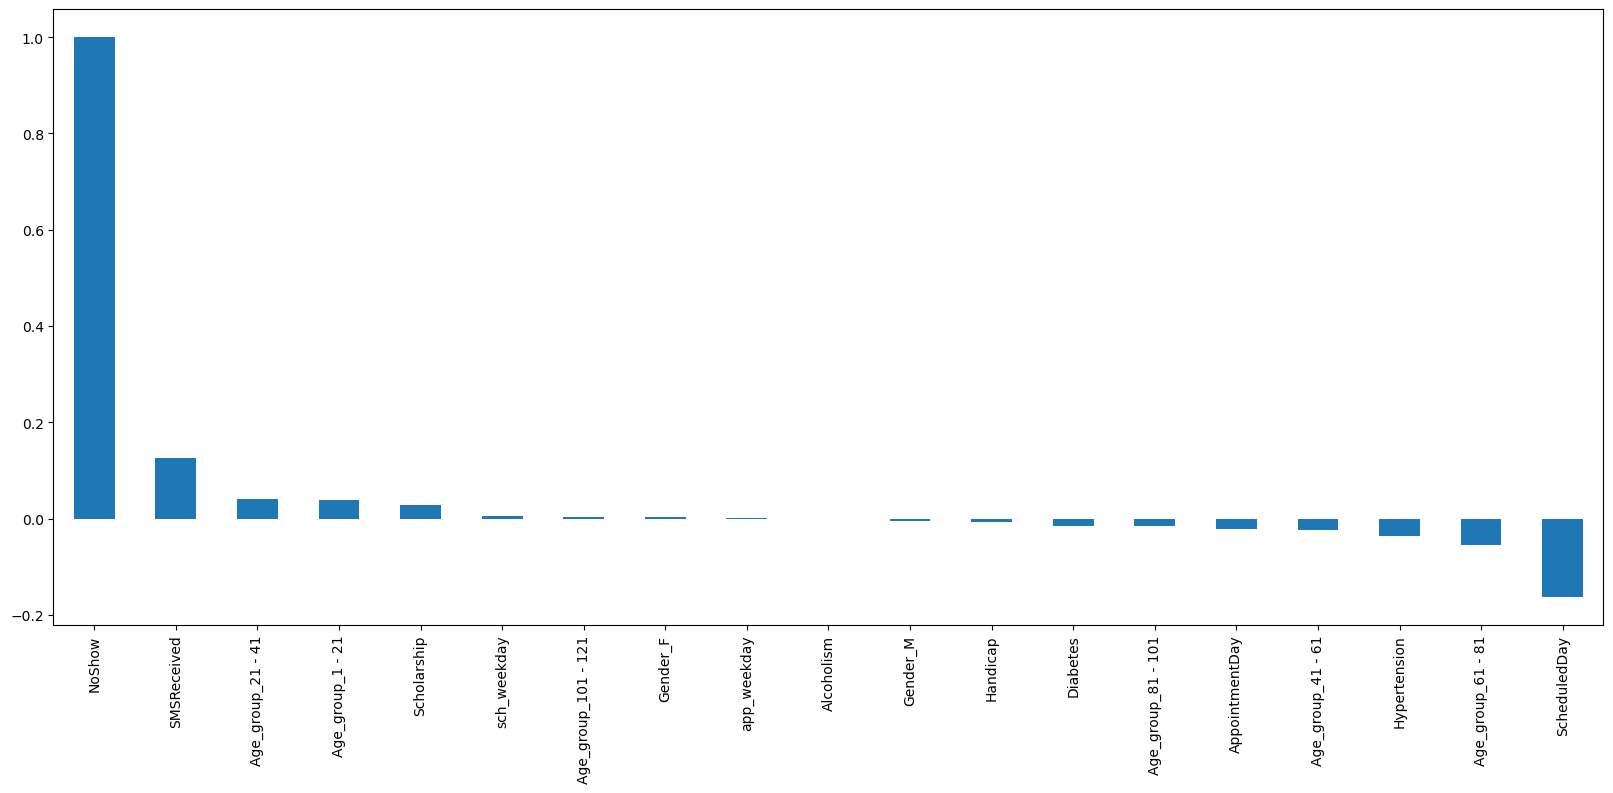

In [33]:
# Build a correlation of all predictors with relation to target variable (NoShow)
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

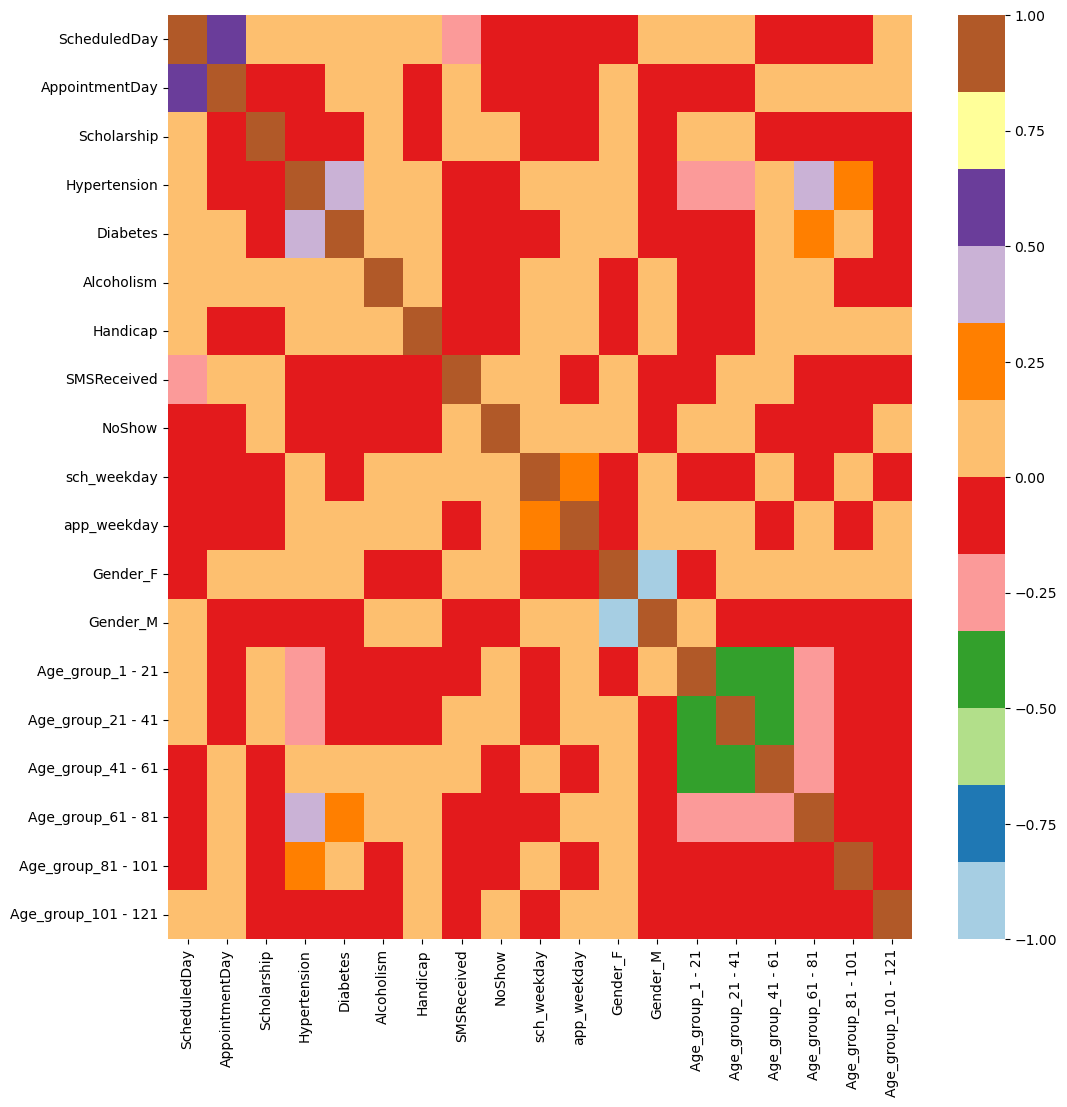

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")

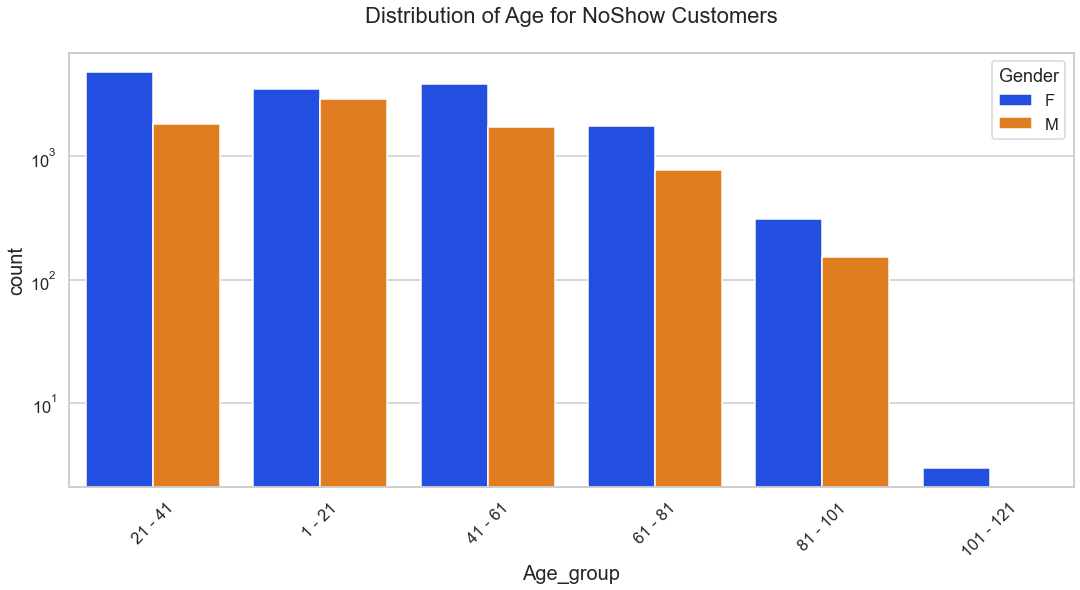

In [40]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

 ## Findings

1. Saturday appointments are most at risk for No-Shows. However, patients who schedule appointments on Saturday (for a different day) exhibit the lowest No-Show rate.
2. Patients who receive SMS notifications have a 65% higher show rate than patients who do not receive SMS notifications. 
3. Patients who enroll in the Boisa Familia Program have 19.8% higher showing-up rate than patient who do not enroll
4. Diabetic patients and patients with hypertension are at increased risk of being No-Shows. 
5. Younger patients have a higher chance of being a No-Show than older patients.
6. Gender and Alcoholism do not appear to affect the rate of No-Shows.